# Discritization 
Discritization is the process of transforming the continous variable into discreate variable by creating set of contigous interval that span the range of variable's value . it is also called the binning , binning is nothing but interval in otherword.

# Why discretization is important. 

- Discretization help to handel the outliers by placing the outliers value in lower and upper binns . 
- Discretization also help to improve the skewed varibales by setting up the binns . 

# What are the method of discretization 
Discretization has categories into two category.
1. Unsupervised discretization 
2. Supervised discretization 

- In Upsupervised discretization we have several approch 
1. Equal Width Discretization
2. Equal frequency Discretization 
3. K-mean Discretization 

- In Supervised Discretization 
1. Decision Tree Discretization 

**********************************************************************************
### 1. Equal Width Discretization 
Equal width discretization , continous variable value divide by N bins with Equal Width . The Equal width are calculated by dividing the range of value by N bins , where N are definne by user . 

`width= (value_max- value_min)/ N `

### 2. Equal Frequency Discretization

Equal Frequency Discretization divide the continous variable into N bins and each bins carry the same amount of observation. 
This discretization method is more helpful for skewed variables as it spread the observation in different bins equally.


Equal Frequency Discretization use  quantile which divide the variable into N quantile , where N is define by the user.

In [12]:
import pandas as pd
import numpy as np

In [3]:
import os 

for dir_name,_,files_name in os.walk(r'C:\Users\Prashant Kumar Singh\Downloads\Study Materials\Python\Feature Engineering on 25th Jan 24\Multiple data set'):
    for file in files_name:
        print(os.path.join(dir_name,file))

C:\Users\Prashant Kumar Singh\Downloads\Study Materials\Python\Feature Engineering on 25th Jan 24\Multiple data set\Housing.csv
C:\Users\Prashant Kumar Singh\Downloads\Study Materials\Python\Feature Engineering on 25th Jan 24\Multiple data set\loan.csv
C:\Users\Prashant Kumar Singh\Downloads\Study Materials\Python\Feature Engineering on 25th Jan 24\Multiple data set\README.md
C:\Users\Prashant Kumar Singh\Downloads\Study Materials\Python\Feature Engineering on 25th Jan 24\Multiple data set\titanic.xlsx


In [4]:
df=pd.read_excel(r"C:\Users\Prashant Kumar Singh\Downloads\Study Materials\Python\Feature Engineering on 25th Jan 24\Multiple data set\titanic.xlsx"
)

In [5]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [6]:
df1=df[["age",'fare','survived']]

In [7]:
df1.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [10]:
df1.isnull().sum()

age         177
fare          0
survived      0
dtype: int64

In [13]:
##replace the null value of age
df1['age']=df1['age'].fillna(np.mean(df1['age']))

C:\Users\Prashant Kumar Singh\AppData\Local\Temp\ipykernel_11424\1608095830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age']=df1['age'].fillna(np.mean(df1['age']))


In [8]:
# N= 8

LABEL=['Bins_'+str(i) for i in range (1,9)]

In [9]:
LABEL

['Bins_1',
 'Bins_2',
 'Bins_3',
 'Bins_4',
 'Bins_5',
 'Bins_6',
 'Bins_7',
 'Bins_8']

In [25]:
Age_disccretised, intervals =pd.qcut( df1['age'],
    8,
    labels=None,
    retbins = True,
    precision = 3,
    duplicates = 'drop')

In [26]:
pd.concat([Age_disccretised,df1['age']],axis=1)

,age,age
0,"(17.0, 22.0]",22.000000
1,"(35.0, 45.0]",38.000000
2,"(22.0, 27.0]",26.000000
3,"(29.699, 35.0]",35.000000
4,"(29.699, 35.0]",35.000000
...,...,...
886,"(22.0, 27.0]",27.000000
887,"(17.0, 22.0]",19.000000
888,"(27.0, 29.699]",29.699118
889,"(22.0, 27.0]",26.000000


In [27]:
intervals

array([ 0.42      , 17.        , 22.        , 27.        , 29.69911765,
       35.        , 45.        , 80.        ])

In [31]:
## check the value counts of each bins
Age_disccretised.value_counts()

(27.0, 29.699]    224
(17.0, 22.0]      118
(35.0, 45.0]      114
(0.419, 17.0]     113
(29.699, 35.0]    113
(22.0, 27.0]      106
(45.0, 80.0]      103
Name: age, dtype: int64

<Axes: >

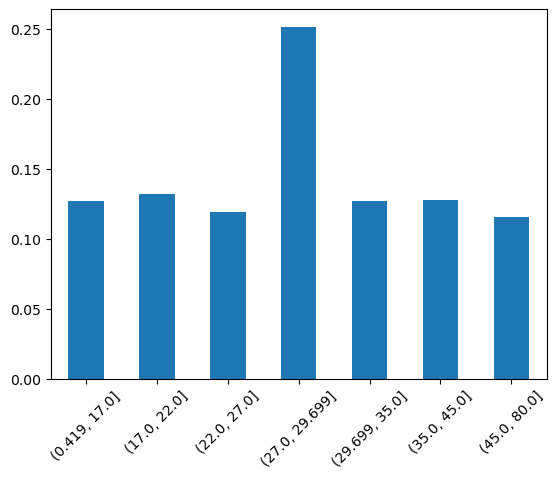

In [30]:
Age_disccretised.value_counts(normalize=True).sort_index().plot.bar(rot=45)

# Thank you !!